In [94]:
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow import keras
import numpy as np
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [95]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [96]:
x_train.shape

(60000, 28, 28)

In [97]:
len(y_train)

60000

In [98]:
x_test.shape

(10000, 28, 28)

In [99]:
len(y_test)

10000

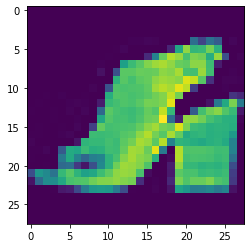

In [100]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[227])
plt.show()

In [101]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32")/ 255.0


In [108]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

<function matplotlib.pyplot.show>

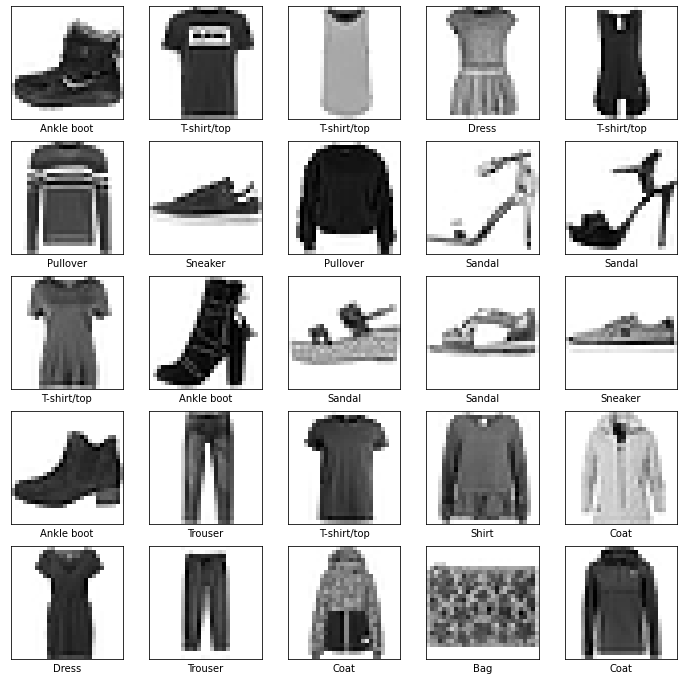

In [117]:
plt.figure(figsize= (12, 12))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow((tf.squeeze(x_train[i])), cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show

In [111]:

model = keras.Sequential([keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', input_shape = (28,28,1)),
                         keras.layers.MaxPooling2D(pool_size = (2, 2)),
                         keras.layers.Dropout(0.25),
                         keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu'), 
                         keras.layers.MaxPooling2D(pool_size = (2, 2)),
                         keras.layers.Dropout(0.25),
                         keras.layers.Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu'),
                         keras.layers.MaxPooling2D(pool_size =(2, 2)),
                         keras.layers.Dropout(0.5),
                         keras.layers.Flatten(),
                         keras.layers.Dense(128, activation = 'relu')
                          


])

model.add(layers.Dense(10, 'softmax'))

In [112]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 5, 5, 128)       

In [113]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])


In [114]:
model.fit(x_train, y_train, epochs = 10, shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.7682 - accuracy: 0.6944
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6876 - accuracy: 0.7733
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6698 - accuracy: 0.7908
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.6595 - accuracy: 0.8012
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6518 - accuracy: 0.8084
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.6482 - accuracy: 0.8120
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6407 - accuracy: 0.8195
Epoch 8/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6391 - accuracy: 0.8208
Epoch 9/10
1875/1875 [==============================] - 50s 27ms/step - loss: 1.6393 - accuracy: 0.8213
Epoch 10/10
1875/1875 [==============================] - 50s 27m

In [115]:
x_loss, x_acc = model.evaluate(x_test, y_test)
print('Fashion_Mnist Data Set Accuracy: ', x_acc*100)

313/313 [==============================] - 2s 8ms/step - loss: 1.6191 - accuracy: 0.8406
Fashion_Mnist Data Set Accuracy:  84.06000137329102
